Ridhwan Nashir - 1301184259 - IF42-01
# **Tugas Besar Machine Learning 2 Classification**

Pada tugas klasifikasi ini metode yang digunakan menggunakan Naive Bayes-Support Vector Machine (NBSVM). Metode klasifikasi ini merupakan gabungan dari metode Naive Bayes dan Support Vector Machine. 

Metode Naïve Bayes (NB) akan melakukan perhitungan dan menghasilkan sebuah feature vector yang kemudian digunakan sebagai input untuk proses perhitungan di metode Support Vector Machine (SVM).

Pada notebook ini, akan dilakukan 3 percobaan yaitu :

1. Klasifikasi menggunakan NB
2. Klasifikasi menggunakan SVM
3. Klasifikasi menggunakan NBSVM

Hasil dari ketiga percobaan tersebut kemudian akan dibandingkan akurasinya.

In [48]:
!pip install nbsvm-sklearn


# Eksplorasi Data

In [49]:
# library
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Test

In [50]:
# datatest
url = 'https://raw.githubusercontent.com/ridhwanashir/ML-Classification-NBSVM/main/salju_test.csv'
datatest = pd.read_csv(url) 
datatest.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [51]:
datatest.dtypes

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

## Data Train

In [52]:
# datatrain
url = 'https://raw.githubusercontent.com/ridhwanashir/ML-Classification-NBSVM/main/salju_train.csv'
datatrain = pd.read_csv(url) 
datatrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [53]:
datatrain.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [54]:
# Cek duplikat datatrain 
duplicate_check = datatrain.duplicated()
print("Sebelum")
print('Jumlah Data Duplikat = %d' % (duplicate_check.sum()))
print('Total Data = %d' % (datatrain.shape[0]))
print('\n')

Sebelum
Jumlah Data Duplikat = 0
Total Data = 109095




# Preprocessing Data


## Drop Missing Value
melakukan drop terhadap data yang mengandung nilai *null*

### Test

In [55]:
# Cek missing value
missingdata=datatest.isnull().sum().sort_values(ascending = False)
print(missingdata)

SinarMatahari               8718
Penguapan                   7856
Awan3pm                     7456
Awan9am                     7042
Tekanan9am                  1865
Tekanan3pm                  1853
ArahAngin9am                1308
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
Kelembaban3pm                548
ArahAngin3pm                 496
Suhu3pm                      442
BersaljuBesok                419
BersaljuHariIni              387
Hujan                        387
KecepatanAngin3pm            354
Kelembaban9am                330
Suhu9am                      219
KecepatanAngin9am            198
SuhuMax                      165
SuhuMin                      165
KodeLokasi                     0
Tanggal                        0
dtype: int64


In [56]:
datatest = datatest.dropna(how='any')
datatest.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [57]:
datatrain.describe

<bound method NDFrame.describe of             id     Tanggal KodeLokasi  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0            1  01/06/2014         C4  ...     15.0               Ya          Tidak
1            2  15/07/2014        C10  ...     15.5               Ya             Ya
2            3  16/02/2011        C46  ...     29.6            Tidak          Tidak
3            4  08/08/2012        C36  ...     23.2            Tidak          Tidak
4            5  29/10/2016         C7  ...     18.1            Tidak          Tidak
...        ...         ...        ...  ...      ...              ...            ...
109090  109091  31/01/2009        C38  ...     22.1            Tidak             Ya
109091  109092  03/11/2010        C16  ...     24.4            Tidak             Ya
109092  109093  11/11/2010        C17  ...     19.8               Ya          Tidak
109093  109094  16/04/2012        C11  ...     29.2            Tidak          Tidak
109094  109095  09/10/2011        C16  ...

### Train

In [58]:
# Cek missing value
missingdata=datatrain.isnull().sum().sort_values(ascending = False)
print(missingdata)

SinarMatahari               52379
Penguapan                   47024
Awan3pm                     44471
Awan9am                     41844
Tekanan9am                  11327
Tekanan3pm                  11308
ArahAngin9am                 7923
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
Kelembaban3pm                3374
ArahAngin3pm                 3197
Suhu3pm                      2698
Hujan                        2431
BersaljuBesok                2431
BersaljuHariIni              2431
KecepatanAngin3pm            2303
Kelembaban9am                2002
KecepatanAngin9am            1353
Suhu9am                      1340
SuhuMin                      1122
SuhuMax                       929
KodeLokasi                      0
Tanggal                         0
id                              0
dtype: int64


In [59]:
datatrain = datatrain.dropna(how='any')
datatrain.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [60]:
datatrain.describe

<bound method NDFrame.describe of             id     Tanggal KodeLokasi  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
3            4  08/08/2012        C36  ...     23.2            Tidak          Tidak
4            5  29/10/2016         C7  ...     18.1            Tidak          Tidak
5            6  12/06/2011        C12  ...     21.1            Tidak          Tidak
6            7  13/06/2009        C36  ...     18.3            Tidak          Tidak
8            9  18/02/2014         C8  ...     34.9            Tidak          Tidak
...        ...         ...        ...  ...      ...              ...            ...
109080  109081  03/02/2010        C40  ...     33.0            Tidak          Tidak
109082  109083  22/07/2014         C2  ...     16.5            Tidak          Tidak
109088  109089  17/11/2015        C25  ...     25.5            Tidak          Tidak
109090  109091  31/01/2009        C38  ...     22.1            Tidak             Ya
109093  109094  16/04/2012        C11  ...

## Pemilihan Fitur
melakukan drop terhadap fitur dengan tipe data object kecuali fitur ***BersajuHariIni*** dan ***BersaljuBesok***

In [61]:
datatrain.drop(['id','Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'], axis='columns', inplace=True)
datatrain.dtypes


SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
KecepatanAnginTerkencang    float64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [62]:
datatest.drop(['Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'], axis='columns', inplace=True)
datatest.dtypes

SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
KecepatanAnginTerkencang    float64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

## Scaling Fitur
menjadikan fitur ***BersajuHariIni*** dan ***BersaljuBesok*** menjadi nilai boolean (1 atau 0), dan melakukan normalisasi terhadap fitur yang lain ke dalam *range* 0-1

### Test

In [63]:
d = {'Yes': 1, 'No': 0}
datatest['BersaljuHariIni'] = datatest['BersaljuHariIni'].map(d)
datatest['BersaljuBesok'] = datatest['BersaljuBesok'].map(d)
datatest.head()


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0


In [64]:
testtarget = datatest.iloc[:,[17]]
testtarget.head()

,BersaljuBesok
2,0
3,0
7,0
8,0
10,0


In [65]:
testdata = datatest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
testdata.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0


In [66]:
from sklearn.preprocessing import MinMaxScaler

nd_datatest = MinMaxScaler(feature_range=(0,1)).fit_transform(testdata)
nd_datatest

array([[0.40524781, 0.48267327, 0.        , ..., 0.35849057, 0.52058111,
        0.        ],
       [0.65306122, 0.47772277, 0.        , ..., 0.58490566, 0.52300242,
        0.        ],
       [0.55685131, 0.36386139, 0.        , ..., 0.47708895, 0.38983051,
        0.        ],
       ...,
       [0.36443149, 0.4480198 , 0.        , ..., 0.43665768, 0.46489104,
        0.        ],
       [0.49854227, 0.46782178, 0.        , ..., 0.44474394, 0.50605327,
        0.        ],
       [0.50145773, 0.47029703, 0.        , ..., 0.60107817, 0.49878935,
        0.        ]])

In [67]:
nd_datatest.shape

(7016, 17)

### Train

In [68]:
d = {'Ya': 1, 'Tidak': 0}
datatrain['BersaljuHariIni'] = datatrain['BersaljuHariIni'].map(d)
datatrain['BersaljuBesok'] = datatrain['BersaljuBesok'].map(d)
datatrain.head()


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0


In [69]:
traintarget = datatrain.iloc[:,[17]]
traintarget.head()

,BersaljuBesok
3,0
4,0
5,0
6,0
8,0


In [70]:
traindata = datatrain.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
traindata.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0


In [71]:
from sklearn.preprocessing import MinMaxScaler

nd_datatrain = MinMaxScaler(feature_range=(0,1)).fit_transform(traindata)
nd_datatrain

array([[0.37634409, 0.44390244, 0.        , ..., 0.39900249, 0.45215311,
        0.        ],
       [0.33870968, 0.34146341, 0.        , ..., 0.32668329, 0.33014354,
        0.        ],
       [0.5672043 , 0.37804878, 0.        , ..., 0.43391521, 0.40191388,
        0.        ],
       ...,
       [0.56451613, 0.48536585, 0.        , ..., 0.5436409 , 0.50717703,
        0.        ],
       [0.72043011, 0.42439024, 0.        , ..., 0.56608479, 0.42583732,
        0.        ],
       [0.47043011, 0.57317073, 0.        , ..., 0.55860349, 0.59569378,
        0.        ]])

In [72]:
nd_datatrain.shape

(42411, 17)

# Klasifikasi


## (1) Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
classNB = GaussianNB()

#Train the model using the training sets
classNB.fit(nd_datatrain,traintarget)
NB_predict = classNB.predict(nd_datatest)


## (2) Support Vector Machine

In [74]:
from sklearn import svm

#Create a svm Classifier
classSVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
classSVM.fit(nd_datatrain, traintarget)

#Predict the response for test dataset
SVM_predict = classSVM.predict(nd_datatest)

## (3) KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

classKNN = KNeighborsClassifier(n_neighbors=5)

classKNN.fit(nd_datatrain, traintarget)

KNN_predict = classKNN.predict(nd_datatest)

## (4) Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

classLR = LogisticRegression()

classLR.fit(nd_datatrain, traintarget)

LR_predict = classLR.predict(nd_datatest)

## (5) Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

classDT = DecisionTreeClassifier()

classDT.fit(nd_datatrain, traintarget)

DT_predict = classDT.predict(nd_datatest)

# Evaluasi

## Akurasi, Confusion Matrix, dan Laporan Klasifikasi

In [78]:
arr_akurasi = []
arr_conf = []
arr_creport = []

In [79]:

# Naive Bayes
from sklearn import metrics
acc = metrics.accuracy_score(testtarget, NB_predict)
confmatrix = metrics.confusion_matrix(testtarget, NB_predict)
classreport = metrics.classification_report(testtarget, NB_predict)

arr_akurasi.append(acc)
arr_conf.append(confmatrix)
arr_creport.append(classreport)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.7847776510832383

Confusion Matrix:
 [[4331 1085]
 [ 425 1175]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      5416
           1       0.52      0.73      0.61      1600

    accuracy                           0.78      7016
   macro avg       0.72      0.77      0.73      7016
weighted avg       0.82      0.78      0.80      7016



In [80]:
# Support Vector Machine

acc = metrics.accuracy_score(testtarget, SVM_predict)
confmatrix = metrics.confusion_matrix(testtarget, SVM_predict)
classreport = metrics.classification_report(testtarget, SVM_predict)

arr_akurasi.append(acc)
arr_conf.append(confmatrix)
arr_creport.append(classreport)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8516248574686431

Confusion Matrix:
 [[5016  400]
 [ 641  959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5416
           1       0.71      0.60      0.65      1600

    accuracy                           0.85      7016
   macro avg       0.80      0.76      0.78      7016
weighted avg       0.85      0.85      0.85      7016



In [81]:
# KNN

acc = metrics.accuracy_score(testtarget, KNN_predict)
confmatrix = metrics.confusion_matrix(testtarget, KNN_predict)
classreport = metrics.classification_report(testtarget, KNN_predict)

arr_akurasi.append(acc)
arr_conf.append(confmatrix)
arr_creport.append(classreport)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8377993158494869

Confusion Matrix:
 [[4986  430]
 [ 708  892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      5416
           1       0.67      0.56      0.61      1600

    accuracy                           0.84      7016
   macro avg       0.78      0.74      0.75      7016
weighted avg       0.83      0.84      0.83      7016



In [82]:
# Logistic Regression

acc = metrics.accuracy_score(testtarget, LR_predict)
confmatrix = metrics.confusion_matrix(testtarget, LR_predict)
classreport = metrics.classification_report(testtarget, LR_predict)

arr_akurasi.append(acc)
arr_conf.append(confmatrix)
arr_creport.append(classreport)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8517673888255416

Confusion Matrix:
 [[4980  436]
 [ 604  996]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      5416
           1       0.70      0.62      0.66      1600

    accuracy                           0.85      7016
   macro avg       0.79      0.77      0.78      7016
weighted avg       0.85      0.85      0.85      7016



In [83]:
# Decision Tree

acc = metrics.accuracy_score(testtarget, DT_predict)
confmatrix = metrics.confusion_matrix(testtarget, DT_predict)
classreport = metrics.classification_report(testtarget, DT_predict)

arr_akurasi.append(acc)
arr_conf.append(confmatrix)
arr_creport.append(classreport)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.75384834663626

Confusion Matrix:
 [[4354 1062]
 [ 665  935]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      5416
           1       0.47      0.58      0.52      1600

    accuracy                           0.75      7016
   macro avg       0.67      0.69      0.68      7016
weighted avg       0.78      0.75      0.76      7016



## Visualisasi Akurasi

In [95]:
arr_metode = ['Naive Bayes','SVM','KNN','Logistic Regression','Decision Tree']

In [99]:
df_akurasi = pd.DataFrame(arr_akurasi, columns=['akurasi'])
df_akurasi['Metode']=arr_metode
df_akurasi = df_akurasi.sort_values(by='akurasi', ascending=False)
df_akurasi

,akurasi,Metode
3,0.851767,Logistic Regression
1,0.851625,SVM
2,0.837799,KNN
0,0.784778,Naive Bayes
4,0.753848,Decision Tree


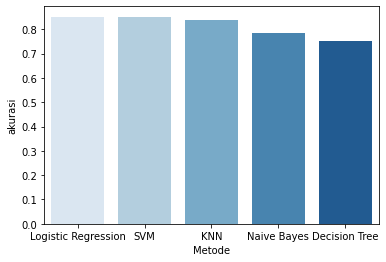

In [100]:
# Akurasi
sns.barplot(data=df_akurasi, x='Metode',y='akurasi',palette = "Blues")